In [1]:
import pandas as pd

In [2]:
training_set=pd.read_csv("Training.csv")

In [3]:
len(training_set)

549

In [4]:
testing_set=pd.read_csv("Testing.csv")

In [5]:
len(testing_set)

42

In [6]:
training_set.head()

,skin_rash,nodal_skin_,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Temp,prognosis
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,106.0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,106.0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,106.0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,106.0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,106.0,0


<Figure size 640x480 with 0 Axes>

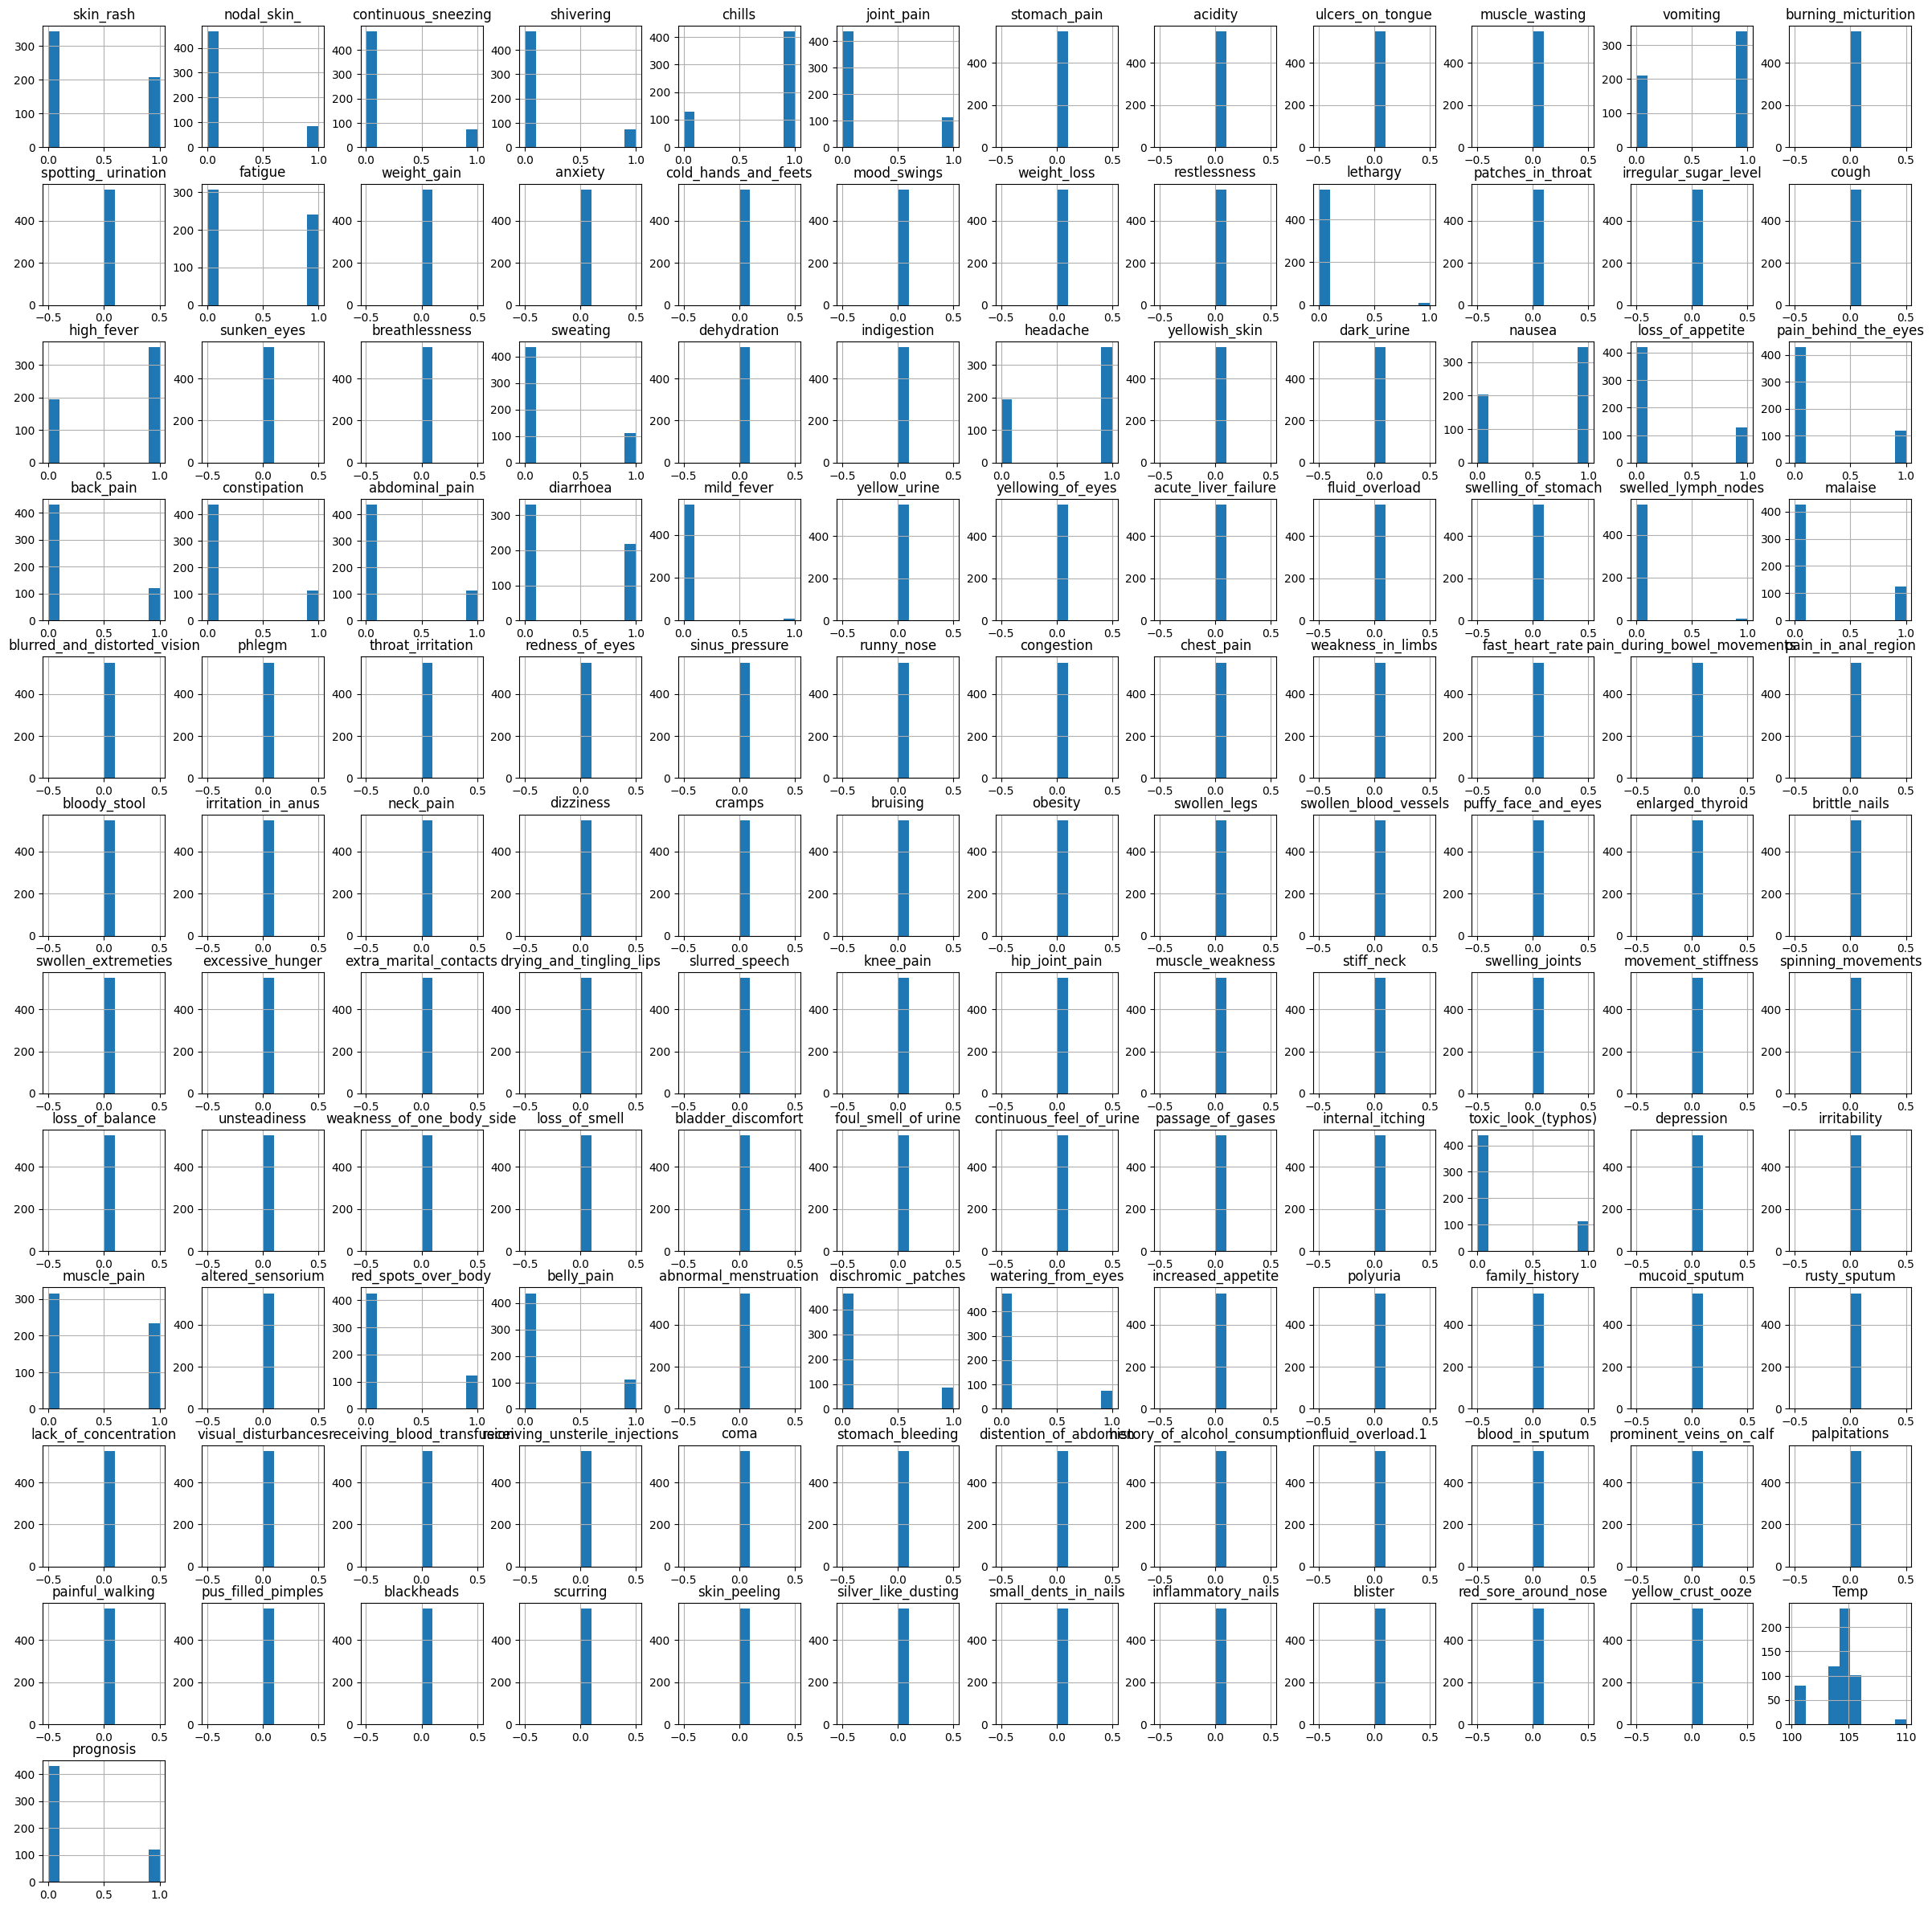

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots_adjust(left=0.1, right=5.9, bottom=.1, top=1.9, wspace=4.4, hspace=4.4)


training_set.hist(bins=10, figsize=(30,30))
plt.show()

In [8]:
print(training_set.dtypes)

skin_rash                 int64
nodal_skin_               int64
continuous_sneezing       int64
shivering                 int64
chills                    int64
                         ...   
blister                   int64
red_sore_around_nose      int64
yellow_crust_ooze         int64
Temp                    float64
prognosis                 int64
Length: 133, dtype: object


In [9]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Columns: 133 entries, skin_rash to prognosis
dtypes: float64(1), int64(132)
memory usage: 570.6 KB


In [10]:
training_set.isnull().sum()

skin_rash               0
nodal_skin_             0
continuous_sneezing     0
shivering               0
chills                  0
                       ..
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
Temp                    0
prognosis               0
Length: 133, dtype: int64

In [11]:
training_set["prognosis"].value_counts()

prognosis
0    429
1    120
Name: count, dtype: int64

## Explotary Data Analysis (EDA)

In [12]:
### in order to this predict our objective is to predict the dengue is infected or not (classify the dengue infected or not)
    ### what attributes are so important for doing so
    ### to  do that we have to  do corrrelational analysis between the prognosis (dependent variable) (y)and other independent variables(x)

In [13]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [14]:
corr_matrix = training_set.corr()

In [15]:
corr_matrix

,skin_rash,nodal_skin_,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Temp,prognosis
skin_rash,1.000000,0.421030,-0.307073,-0.307073,-0.441899,0.602421,NaN,NaN,NaN,NaN,-0.153271,NaN,NaN,0.190328,NaN,NaN,NaN,NaN,NaN,NaN,0.136343,NaN,NaN,NaN,-0.137241,NaN,NaN,-0.396066,NaN,NaN,-0.090120,NaN,NaN,-0.125080,0.650306,0.625250,0.625250,-0.393859,-0.393859,-0.633778,0.136343,NaN,NaN,NaN,NaN,NaN,0.136343,0.631379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.393859,NaN,NaN,0.153206,NaN,0.631379,-0.393859,NaN,0.421030,-0.307073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.291930,0.625250
nodal_skin_,0.421030,1.000000,-0.167758,-0.167758,-0.763042,-0.217581,NaN,NaN,NaN,NaN,-0.540012,NaN,NaN,-0.375964,NaN,NaN,NaN,NaN,NaN,NaN,-0.054870,NaN,NaN,NaN,-0.572661,NaN,NaN,-0.216376,NaN,NaN,-0.572661,NaN,NaN,-0.552723,-0.235550,-0.224789,-0.224789,-0.215170,-0.215170,-0.346241,-0.054870,NaN,NaN,NaN,NaN,NaN,-0.054870,-0.229578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.215170,NaN,NaN,-0.364962,NaN,-0.229578,-0.215170,NaN,0.831336,-0.167758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.364072,-0.224789
continuous_sneezing,-0.307073,-0.167758,1.000000,0.812575,0.069293,-0.202058,NaN,NaN,NaN,NaN,-0.501487,NaN,NaN,-0.349142,NaN,NaN,NaN,NaN,NaN,NaN,-0.050956,NaN,NaN,NaN,-0.531806,NaN,NaN,-0.200939,NaN,NaN,-0.531806,NaN,NaN,-0.513291,-0.218746,-0.208752,-0.208752,-0.199819,-0.199819,-0.321539,-0.050956,NaN,NaN,NaN,NaN,NaN,-0.050956,-0.213199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.19981

In [16]:
corr_matrix["prognosis"].sort_values(ascending=False)

back_pain                         1.000000
pain_behind_the_eyes              1.000000
prognosis                         1.000000
joint_pain                        0.967934
loss_of_appetite                  0.954315
malaise                           0.915901
red_spots_over_body               0.915901
skin_rash                         0.625250
muscle_pain                       0.562421
fatigue                           0.544613
nausea                            0.406694
headache                          0.392534
vomiting                          0.361855
high_fever                        0.337278
chills                            0.232391
lethargy                         -0.068279
mild_fever                       -0.068279
swelled_lymph_nodes              -0.068279
Temp                             -0.096828
continuous_sneezing              -0.208752
watering_from_eyes               -0.208752
shivering                        -0.208752
dischromic _patches              -0.224789
nodal_skin_

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='back_pain', ylabel='prognosis'>,
        <Axes: xlabel='pain_behind_the_eyes', ylabel='prognosis'>,
        <Axes: xlabel='joint_pain', ylabel='prognosis'>,
        <Axes: xlabel='loss_of_appetite', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='back_pain'>,
        <Axes: xlabel='back_pain', ylabel='back_pain'>,
        <Axes: xlabel='pain_behind_the_eyes', ylabel='back_pain'>,
        <Axes: xlabel='joint_pain', ylabel='back_pain'>,
        <Axes: xlabel='loss_of_appetite', ylabel='back_pain'>],
       [<Axes: xlabel='prognosis', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='back_pain', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='pain_behind_the_eyes', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='joint_pain', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='loss_of_appetite', ylabel='pain_behind_the_eyes'>],
       [<Axes: xlabel='prognosis', ylabel='jo

<Figure size 640x480 with 0 Axes>

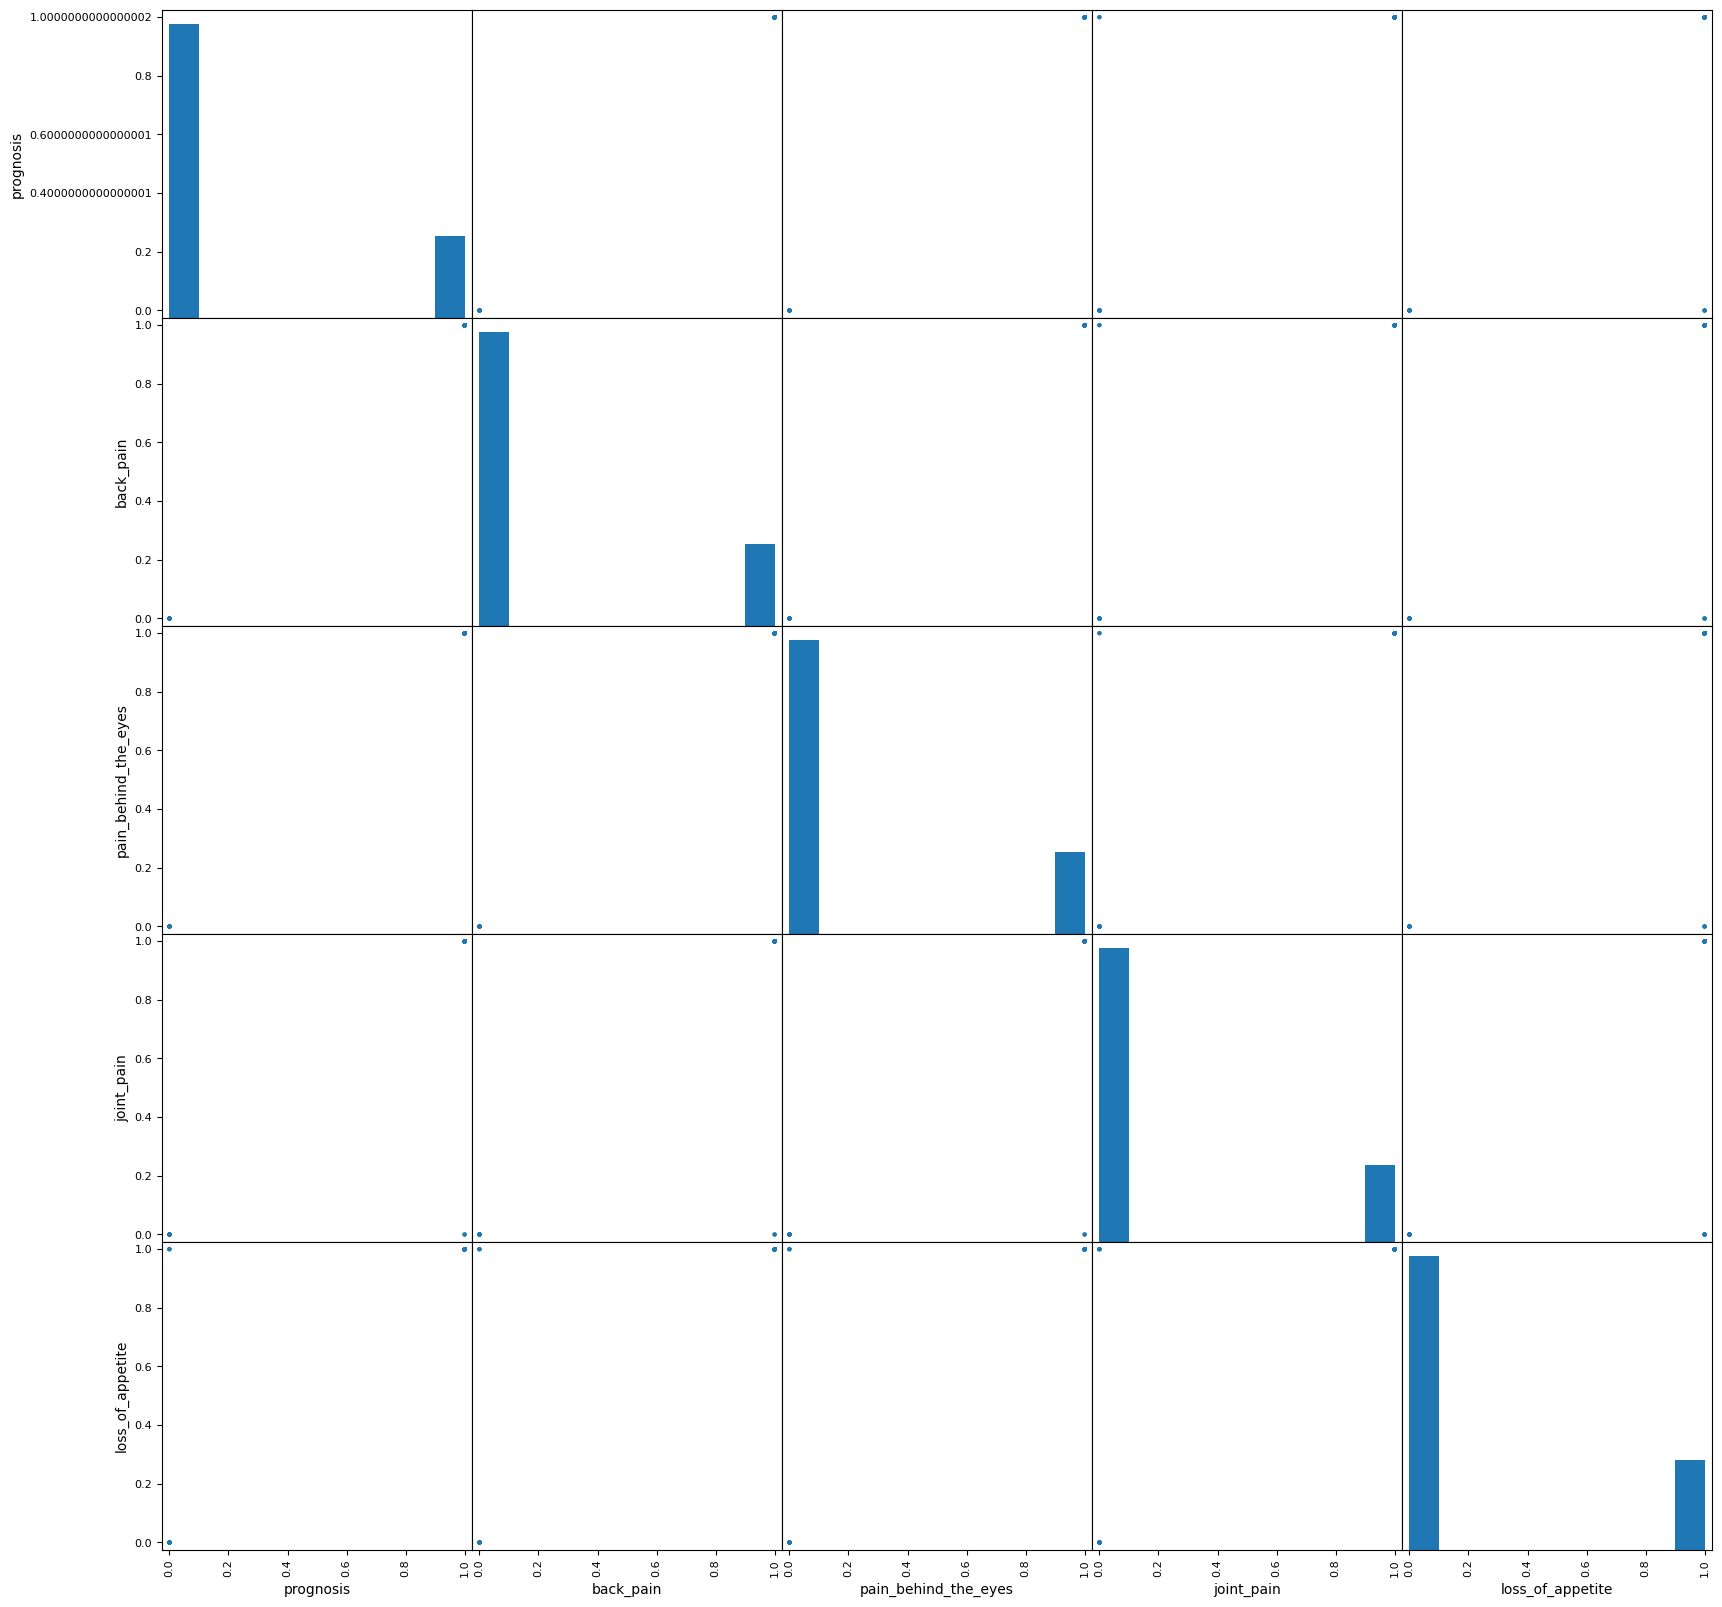

In [22]:
from pandas.plotting import scatter_matrix
plt.subplots_adjust(left=2.1, right=5.9, bottom=1.9, top=2.9, wspace=4.4, hspace=4.4)
attributes = ["prognosis","back_pain", "pain_behind_the_eyes","joint_pain","loss_of_appetite"]
scatter_matrix(training_set[attributes], figsize=(20,20))

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='malaise', ylabel='prognosis'>,
        <Axes: xlabel='red_spots_over_body', ylabel='prognosis'>,
        <Axes: xlabel='skin_rash', ylabel='prognosis'>,
        <Axes: xlabel='muscle_pain', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='malaise'>,
        <Axes: xlabel='malaise', ylabel='malaise'>,
        <Axes: xlabel='red_spots_over_body', ylabel='malaise'>,
        <Axes: xlabel='skin_rash', ylabel='malaise'>,
        <Axes: xlabel='muscle_pain', ylabel='malaise'>],
       [<Axes: xlabel='prognosis', ylabel='red_spots_over_body'>,
        <Axes: xlabel='malaise', ylabel='red_spots_over_body'>,
        <Axes: xlabel='red_spots_over_body', ylabel='red_spots_over_body'>,
        <Axes: xlabel='skin_rash', ylabel='red_spots_over_body'>,
        <Axes: xlabel='muscle_pain', ylabel='red_spots_over_body'>],
       [<Axes: xlabel='prognosis', ylabel='skin_rash'>,
        <Axes: xlabel='malaise'

<Figure size 640x480 with 0 Axes>

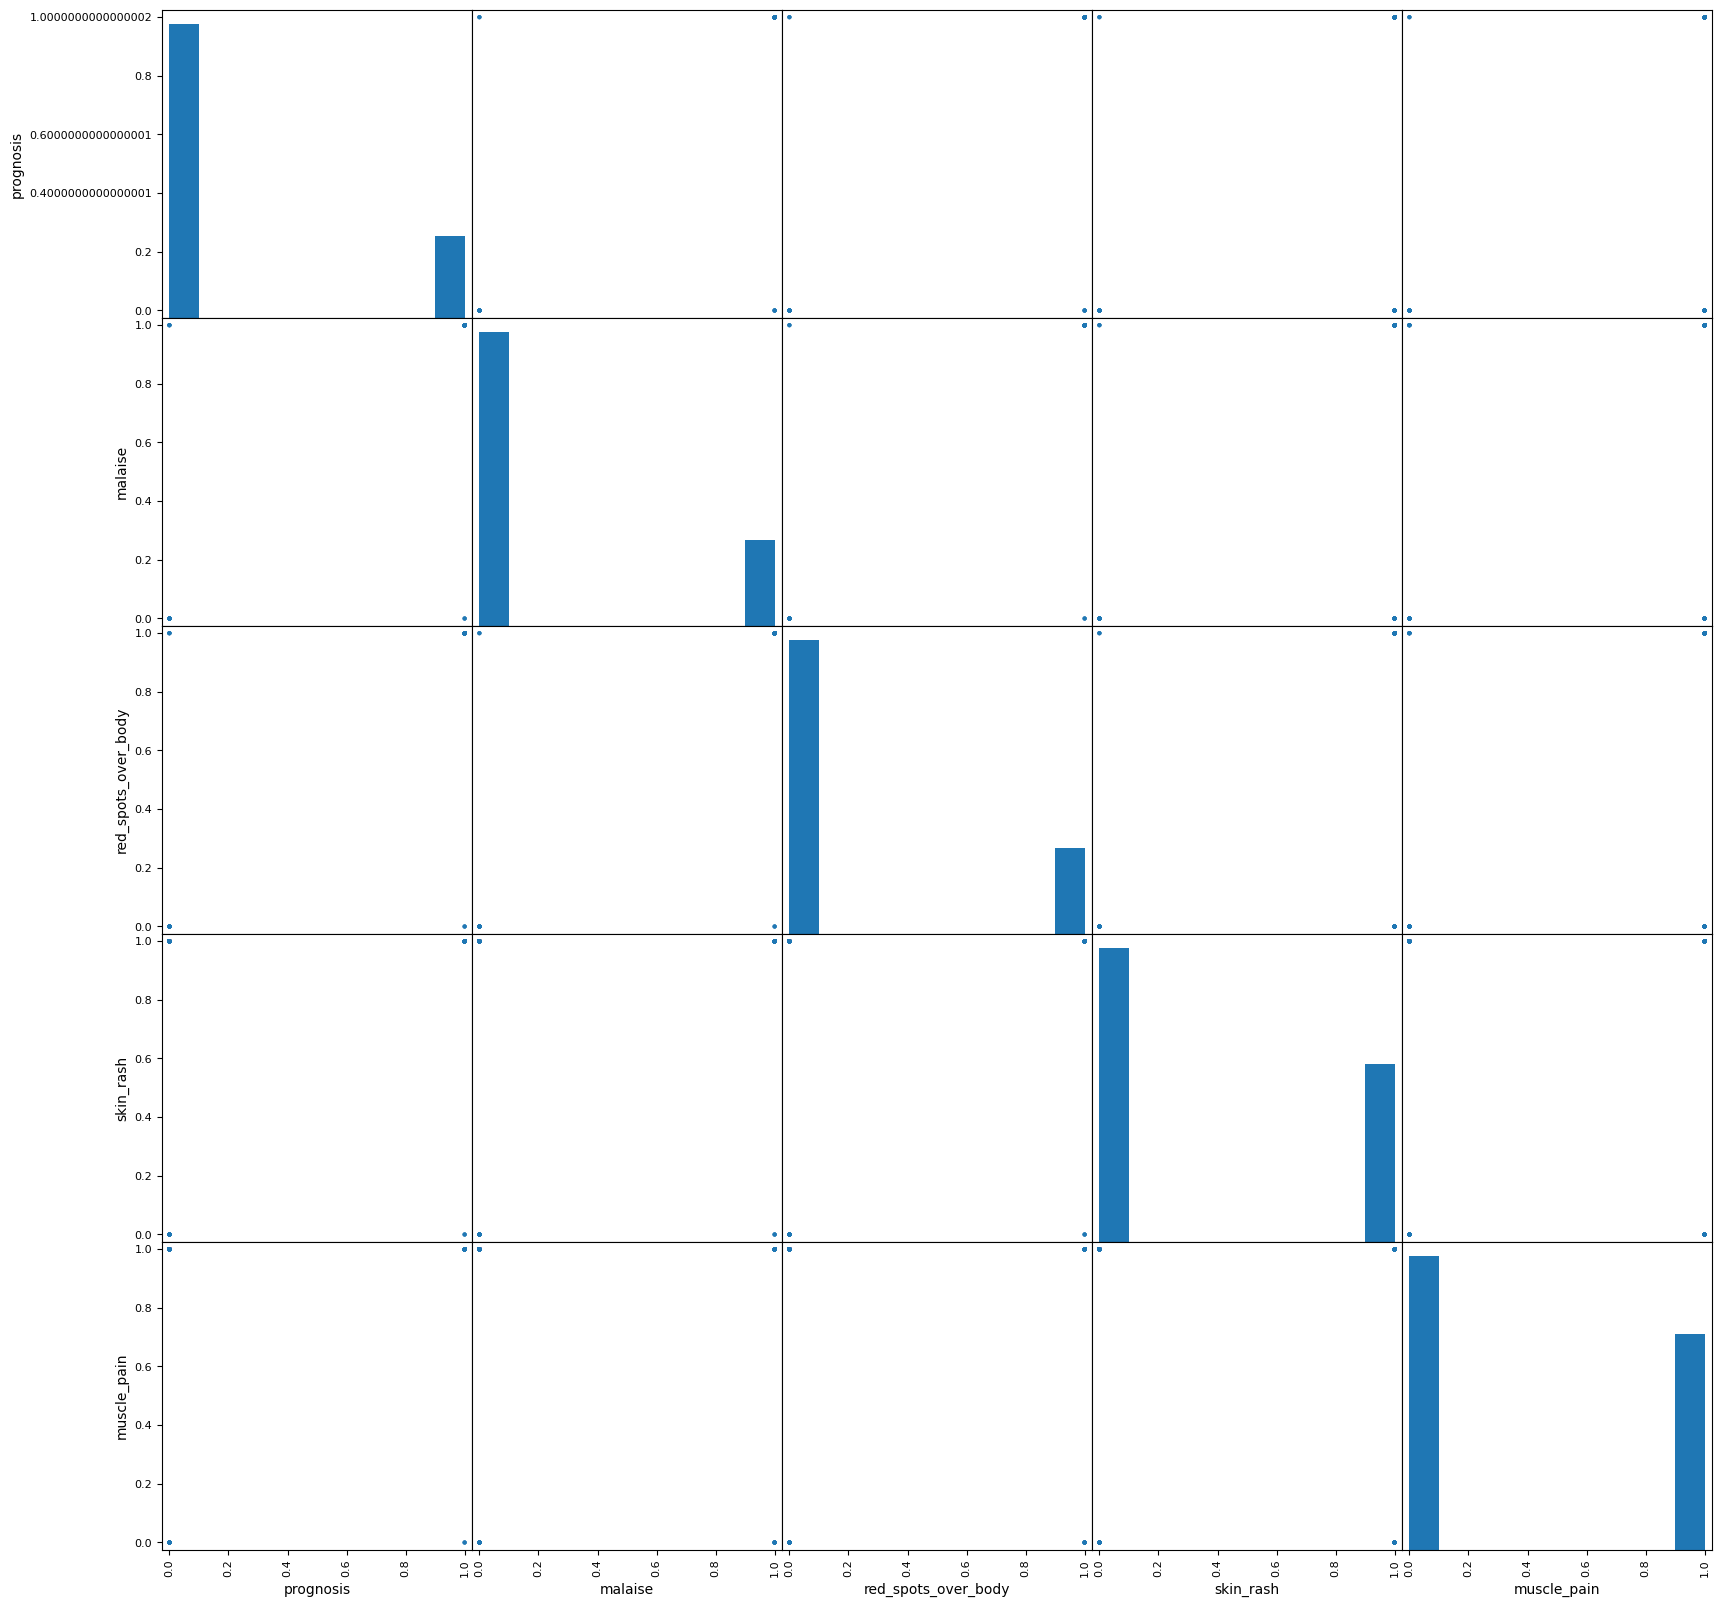

In [21]:
from pandas.plotting import scatter_matrix
plt.subplots_adjust(left=2.1, right=5.9, bottom=1.9, top=2.9, wspace=4.4, hspace=4.4)
attributes = ["prognosis","malaise","red_spots_over_body","skin_rash","muscle_pain",]
scatter_matrix(training_set[attributes], figsize=(20,20))

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='fatigue', ylabel='prognosis'>,
        <Axes: xlabel='nausea', ylabel='prognosis'>,
        <Axes: xlabel='headache', ylabel='prognosis'>,
        <Axes: xlabel='vomiting', ylabel='prognosis'>,
        <Axes: xlabel='high_fever', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='fatigue'>,
        <Axes: xlabel='fatigue', ylabel='fatigue'>,
        <Axes: xlabel='nausea', ylabel='fatigue'>,
        <Axes: xlabel='headache', ylabel='fatigue'>,
        <Axes: xlabel='vomiting', ylabel='fatigue'>,
        <Axes: xlabel='high_fever', ylabel='fatigue'>],
       [<Axes: xlabel='prognosis', ylabel='nausea'>,
        <Axes: xlabel='fatigue', ylabel='nausea'>,
        <Axes: xlabel='nausea', ylabel='nausea'>,
        <Axes: xlabel='headache', ylabel='nausea'>,
        <Axes: xlabel='vomiting', ylabel='nausea'>,
        <Axes: xlabel='high_fever', ylabel='nausea'>],
       [<Axes: xlabel='prognosis', yl

<Figure size 640x480 with 0 Axes>

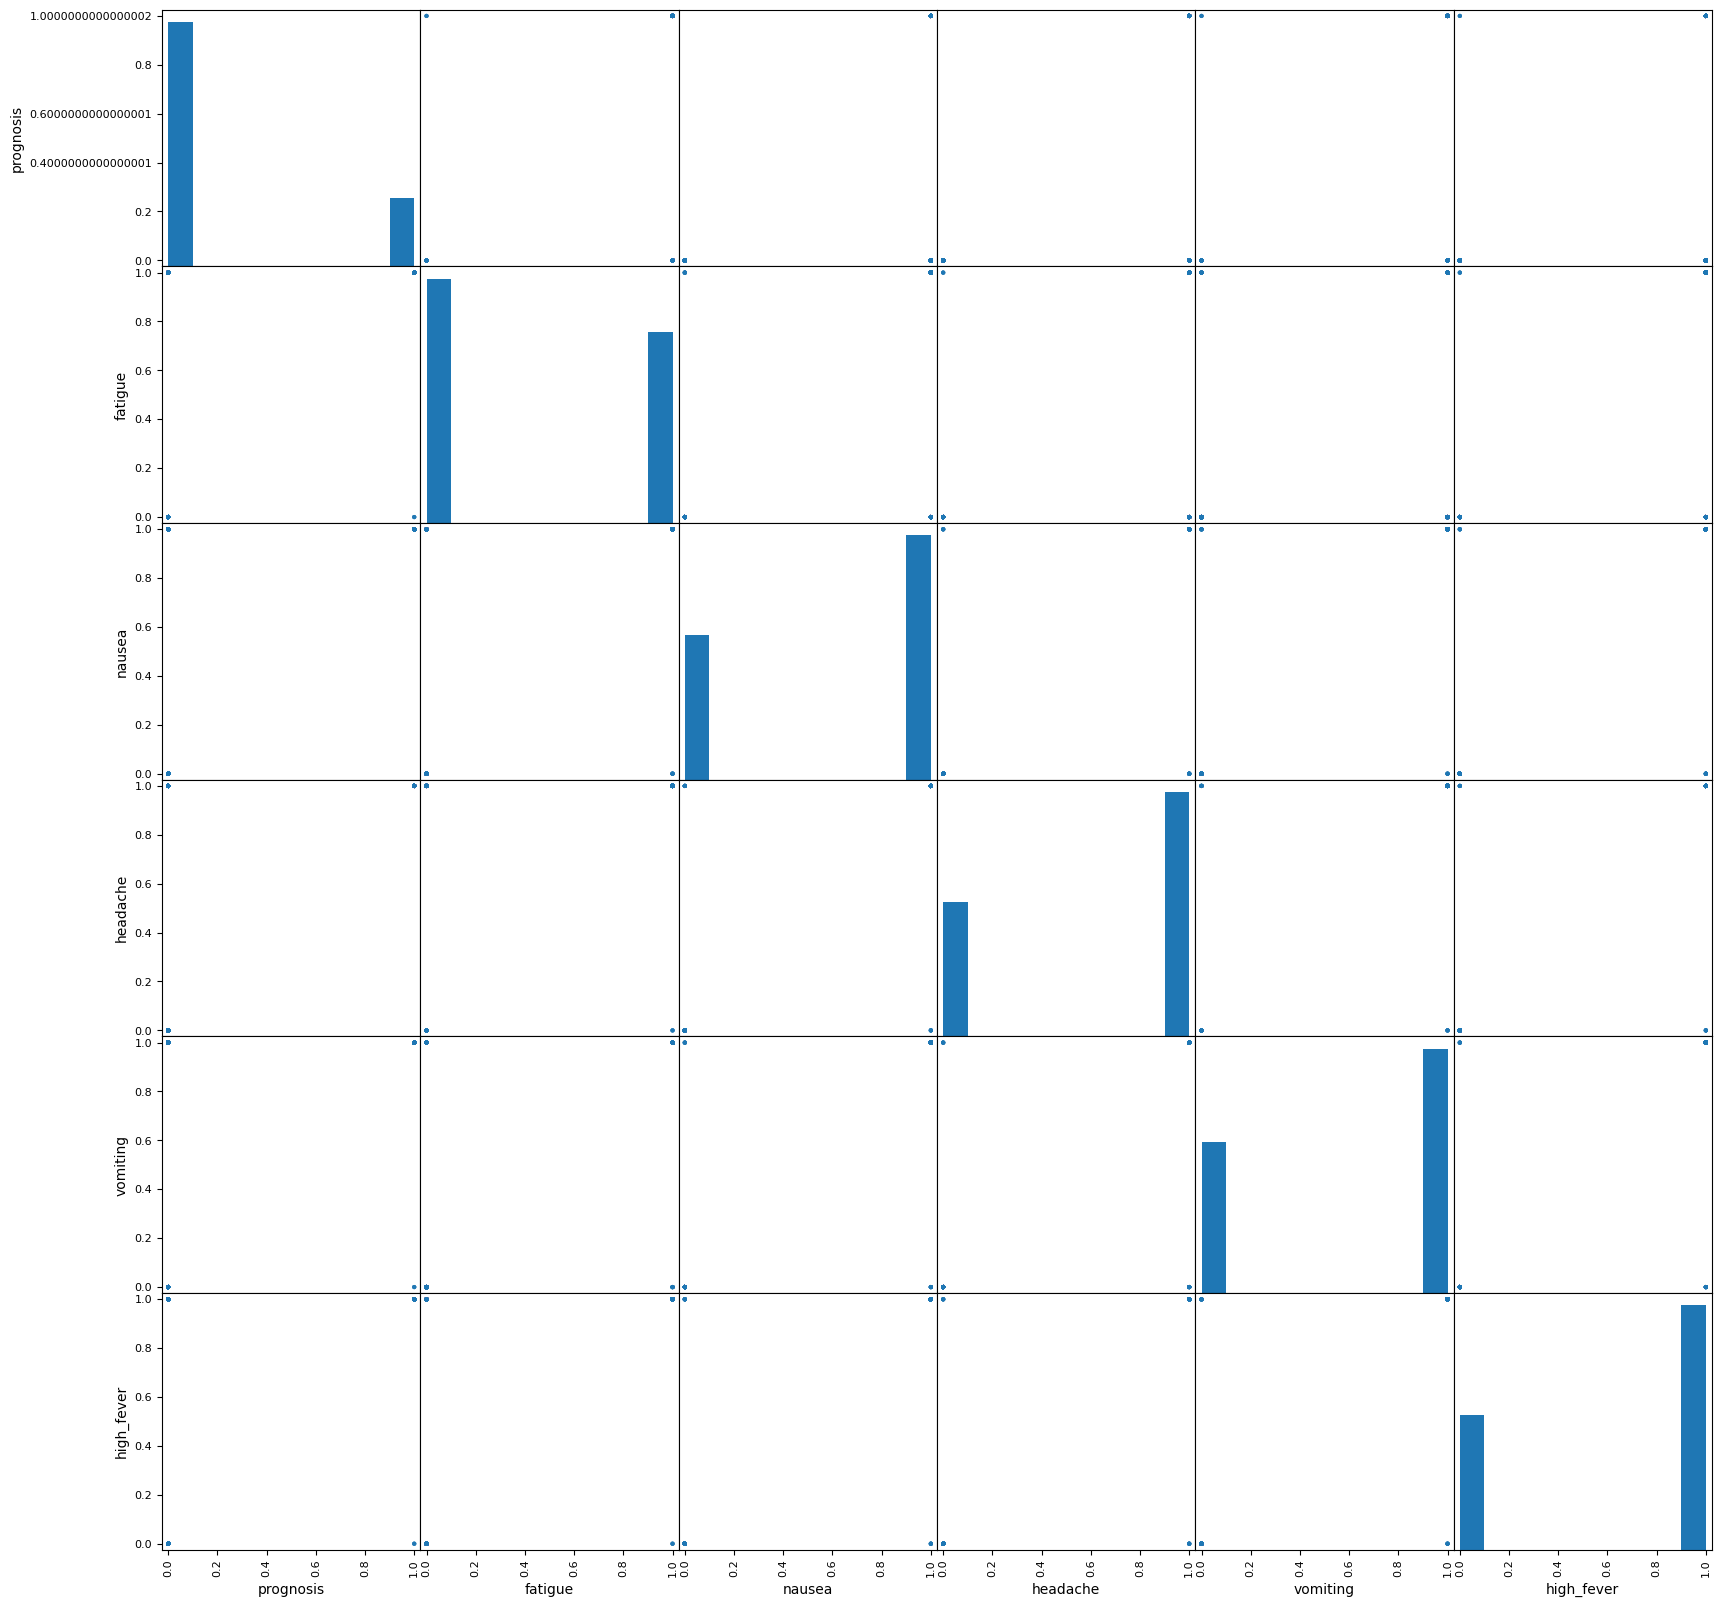

In [19]:
from pandas.plotting import scatter_matrix
plt.subplots_adjust(left=2.1, right=5.9, bottom=1.9, top=2.9, wspace=4.4, hspace=4.4)
attributes = ["prognosis","fatigue","nausea","headache","vomiting", "high_fever"]
scatter_matrix(training_set[attributes], figsize=(20,20))

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='toxic_look_(typhos)', ylabel='prognosis'>,
        <Axes: xlabel='abdominal_pain', ylabel='prognosis'>,
        <Axes: xlabel='belly_pain', ylabel='prognosis'>,
        <Axes: xlabel='constipation', ylabel='prognosis'>,
        <Axes: xlabel='sweating', ylabel='prognosis'>,
        <Axes: xlabel='diarrhoea', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='toxic_look_(typhos)', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='abdominal_pain', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='belly_pain', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='constipation', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='sweating', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='diarrhoea', ylabel='toxic_look_(typhos)'>],
       [<Axes: xlabel='prognosis', ylabel='abdominal_pain'>,
        <Axes: xlabel='toxic_look_(typhos)', yl

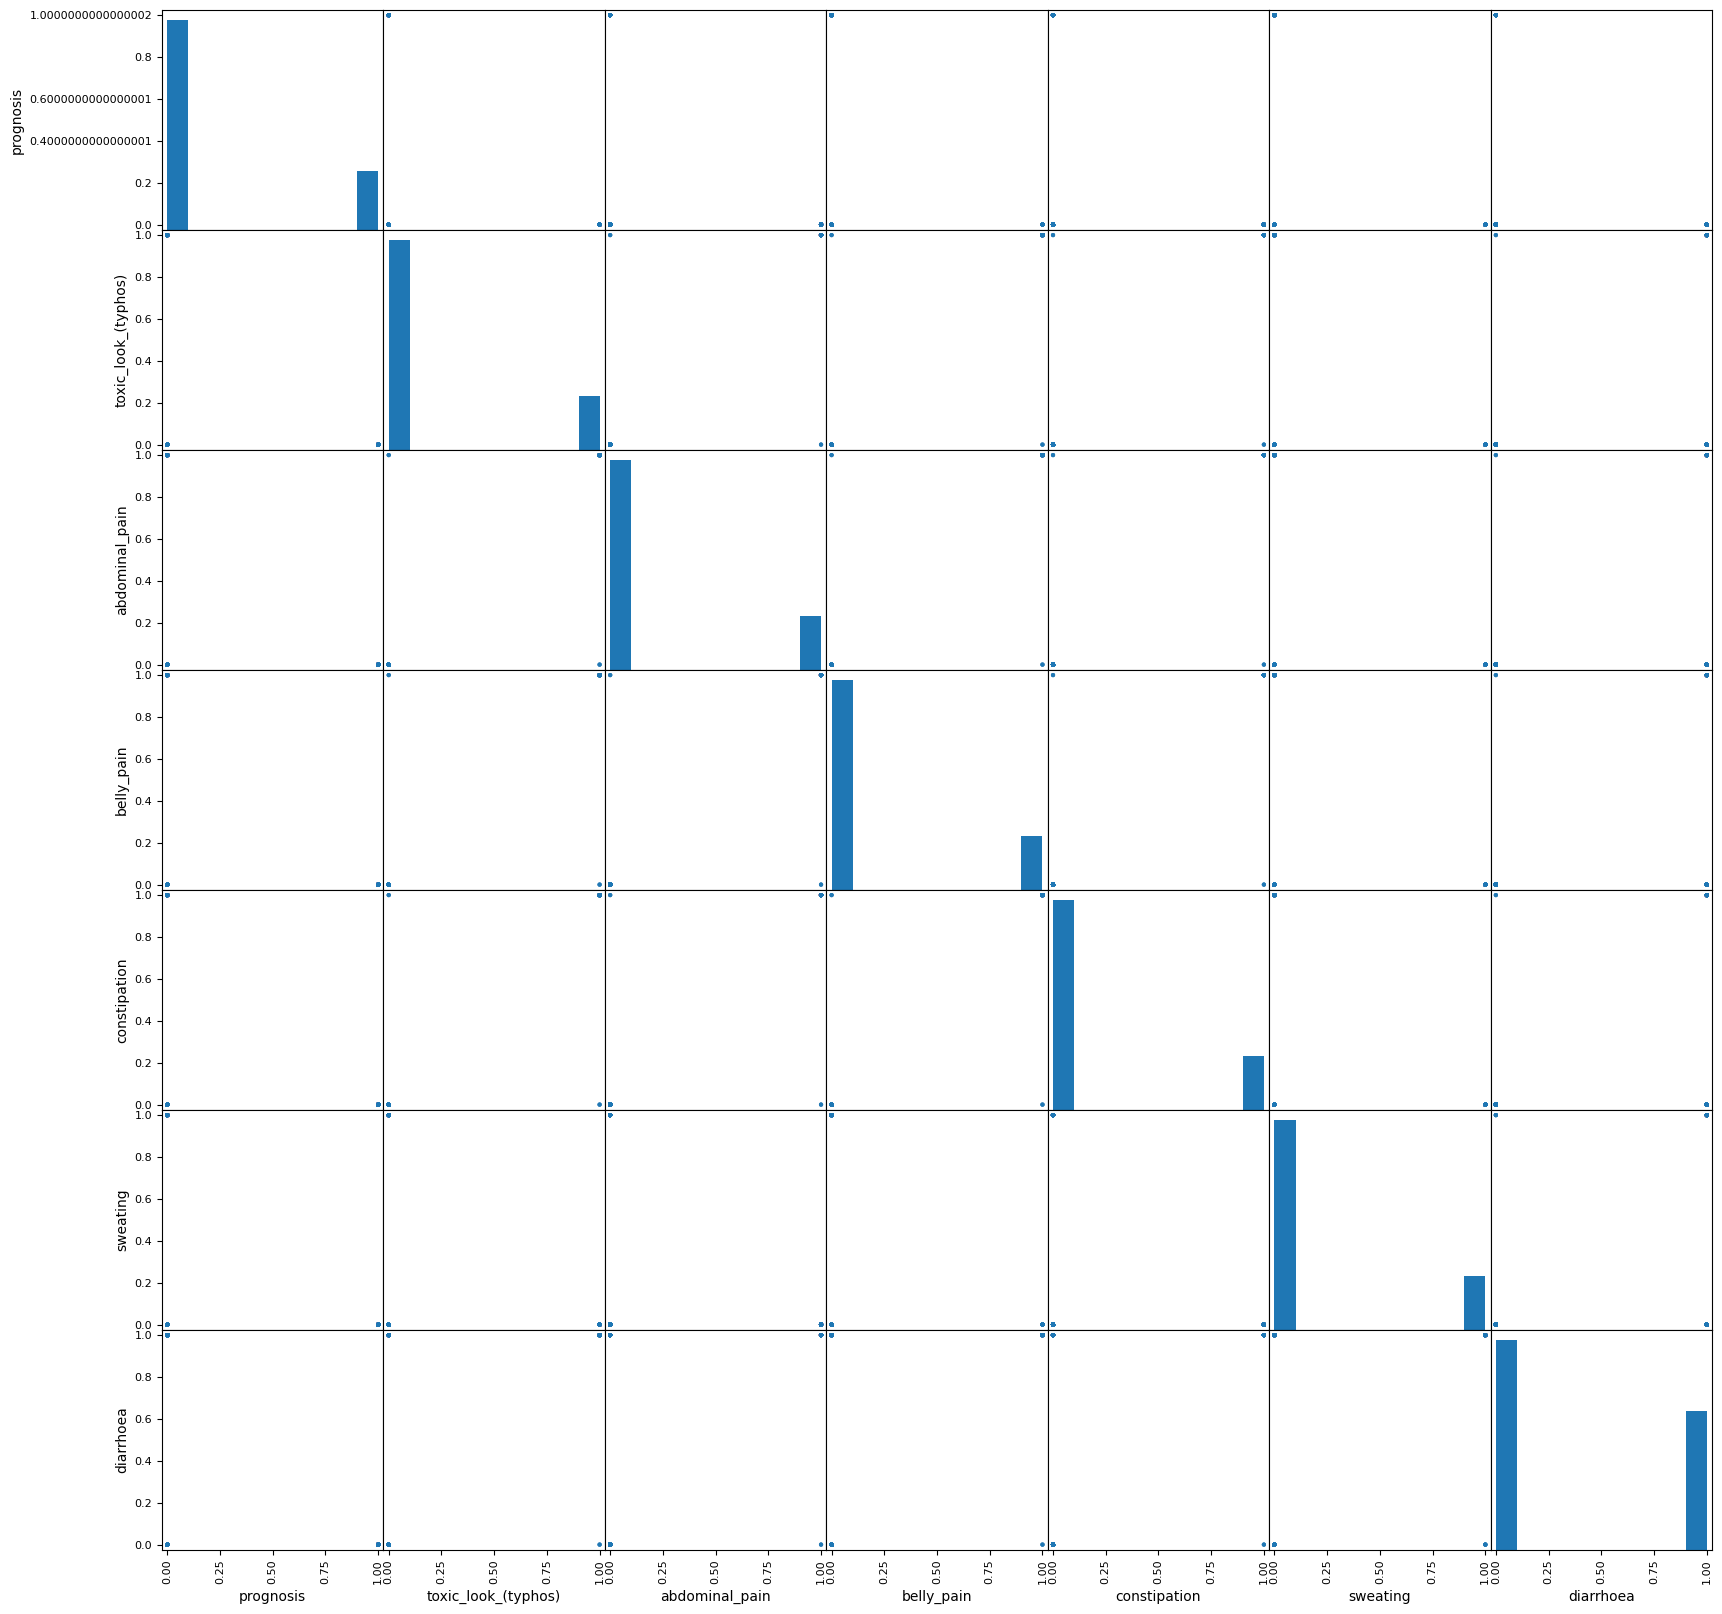

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["prognosis","toxic_look_(typhos)","abdominal_pain","belly_pain", "constipation", "sweating","diarrhoea"]
scatter_matrix(training_set[attributes], figsize=(20,20))